# Artificial Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from NeuralNetwork import NeuralNetwork,Layer,InputLayer,sigmoid,linear,relu

### Load the dataset

In [2]:
df = pd.read_excel('concrete_data.xlsx')
df.head()

,cement,water,superplasticizer,age,concrete_compressive_strength
0,540.0,162.0,2.5,28,79.99
1,540.0,162.0,2.5,28,61.89
2,332.5,228.0,0.0,270,40.27
3,332.5,228.0,0.0,365,41.05
4,198.6,192.0,0.0,360,44.30


### Dataset Analysis

In [3]:
df.isna().sum()

cement                           0
water                            0
superplasticizer                 0
age                              0
concrete_compressive_strength    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         700 non-null    float64
 1   water                          700 non-null    float64
 2   superplasticizer               700 non-null    float64
 3   age                            700 non-null    int64  
 4   concrete_compressive_strength  700 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 27.5 KB


In [5]:
df.describe()

,cement,water,superplasticizer,age,concrete_compressive_strength
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,286.917286,178.059857,6.506857,49.010000,37.642514
std,101.379325,23.030158,6.289468,68.400978,17.607925
min,102.000000,121.800000,0.000000,3.000000,2.330000
25%,212.000000,159.500000,0.000000,7.000000,24.280000
50%,254.000000,178.500000,6.500000,28.000000,36.615000
75%,374.000000,192.000000,10.900000,56.000000,50.120000
max,540.000000,228.000000,32.200000,365.000000,82.600000


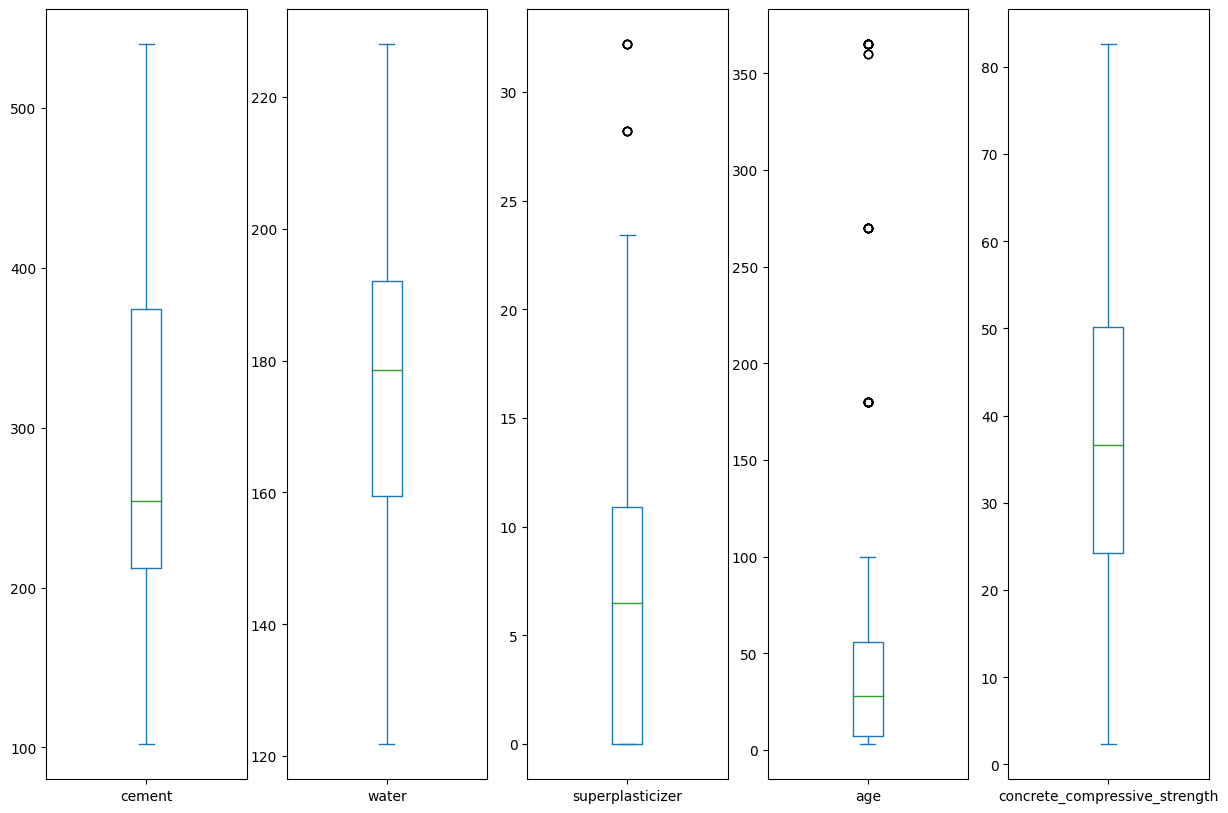

In [6]:
df.plot(kind='box', figsize=(15, 10), subplots=True)
plt.show()

### Dataset Preprocessing

In [7]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df['concrete_compressive_strength']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = y_train.values.reshape(-1, 1)


### Training the Neural Network 

In [9]:
nn = NeuralNetwork(layers=[
    InputLayer(4),
    Layer(128, sigmoid),
    Layer(1, linear)
])

nn.summary()

nn.fit(x_train, y_train, epochs=1000, learning_rate=0.01)

Neural Network with 3 layers
[
Input Layer (4, 4) with 4 neurons
Layer (4, 128) with 128 neurons
Layer (128, 1) with 1 neurons
]
Epoch: 1/1000, Error: 263.539944
Epoch: 2/1000, Error: 200.158099
Epoch: 3/1000, Error: 196.598827
Epoch: 4/1000, Error: 196.740011
Epoch: 5/1000, Error: 196.394176
Epoch: 6/1000, Error: 195.922983
Epoch: 7/1000, Error: 195.471157
Epoch: 8/1000, Error: 195.060621
Epoch: 9/1000, Error: 194.679754
Epoch: 10/1000, Error: 194.290243
Epoch: 11/1000, Error: 193.760136
Epoch: 12/1000, Error: 192.468561
Epoch: 13/1000, Error: 188.469120
Epoch: 14/1000, Error: 179.281642
Epoch: 15/1000, Error: 165.065104
Epoch: 16/1000, Error: 150.684251
Epoch: 17/1000, Error: 140.058649
Epoch: 18/1000, Error: 132.257818
Epoch: 19/1000, Error: 124.828853
Epoch: 20/1000, Error: 116.803150
Epoch: 21/1000, Error: 109.158814
Epoch: 22/1000, Error: 102.587064
Epoch: 23/1000, Error: 97.408687
Epoch: 24/1000, Error: 93.469673
Epoch: 25/1000, Error: 90.426641
Epoch: 26/1000, Error: 88.011380


### Plot the loss over the training

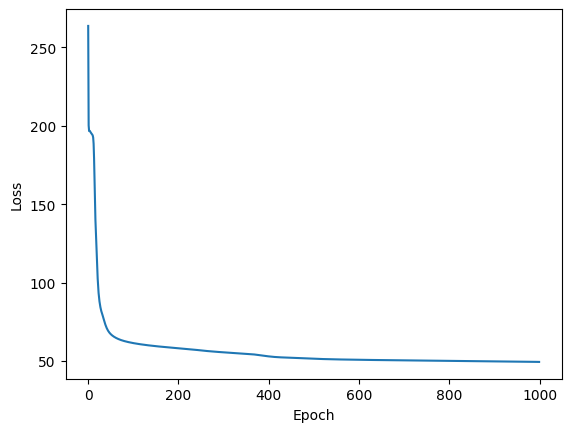

In [10]:
plt.plot(nn.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Testing the Neural Network

In [11]:
y_pred = nn.predict(x_test)

print('Predicted: ', y_pred)

error = nn.calculate_accuracy(y_test, y_pred)

print('Neural Network MSE Error: ', error)

Predicted:  [64.10411448731574, 50.493906989717686, 59.504772583919845, 65.33976175514248, 45.30346858366461, 34.381334930770294, 15.22383308548233, 14.332607265834536, 44.28940844145535, 48.06552938229595, 17.868683153509867, 66.76252476193187, 14.12682087365543, 39.10071556426871, 22.662774141033577, 32.322651226159024, 41.515505307622135, 61.821989251253086, 12.369797693076716, 49.32043443974814, 35.39406292600269, 59.84738522460157, 15.604912955960199, 27.865369032061505, 15.297990808772237, 46.59888719595972, 45.30082105071402, 10.192822071773772, 47.20714521613996, 47.12803341496354, 55.53940863588835, 14.984451221674174, 64.6361269940407, 48.25060688247484, 67.04152657860902, 29.358013906941604, 28.09110894527461, 62.39085290420671, 18.887020008260844, 61.41035864882903, 67.95165609680383, 41.205128412371806, 15.282602249960728, 13.146437937217481, 33.91229452435415, 11.020539946380286, 26.65513404650598, 49.726931172238366, 49.17242479578323, 67.06068332309246, 41.0960060909536